# 퍼셉트론이란?
: 인공 신경망의 기초 구성요소

- 입력값 : 여러 개의 입력 신호를 받는다.(x1, x2, ..., xn)
- 가중치 : 입력 신호의 중요도를 조절하는 역할을 한다.(w1, w2, ..., wn)
- 바이어스 : 가중합에 더해지는 상수(b), 뉴런이 활성화되는 기준
- 가중합 : 입력값과 가중치를 곱하고 바이어스를 더한 값(w1x1 + w2x2 + ... + wnxn + b)
- 활성화 함수 : 가중 합이 임계값을 넘는지 판단하여 출력을 결정한다.

    - z = w1x1 + w2x2 + ... + wnxn + b
    - y = 1 if z >= 0
    - y = 0 if z <= 0 ---> 계단함수
 
1) 실제 학습
- 초기화 : 가중치와 바이어스를 무작위 설정
- 예측 : 현재 가중치와 바이어스를 사용하여 예측을 수행
- 오차 계산 : 예측값과 실제값의 차이를 계산한다.
- 가중치 업데이트 : wi = wi + Δwi
    - Δwi = η(y_true - y_pred)xi (η : 학습률)
  
=> 이러한 과정을 반복하여 가중치와 바이어스를 조정한다.

### -> 퍼셉트론은 단순한 선형 문제는 해결이 가능하지만, 비선형 문제를 해결할 수 없다.
#### 따라서 나오게 된 해결책 : 다층 퍼셉트론

# 다층 퍼셉트론
: 여러 층의 뉴런(퍼셉트론)으로 구성되어 있다.

- MLP는 단일 퍼셉트론의 한계, 문제점을 해결하고 복잡한 비선형 문제를 풀 수 있다.(Multi-Layer Perceptron)

1) 입력층 : 입력 데이터를 받는 뉴런들로 구성된다.
2) 은닉층 : 입력층과 출력층 사이에 위치한 뉴런들, 입력 데이터를 처리하여 다음층으로 전달한다.(다음층 : 무조건 출력층인 것은 아니다.(하나 이상의 은닉층을 가질 수 있기 때문에))
3) 출력층 : 최종 예측값을 출력하는 뉴런들로 구성된다.

- MLP는 각 뉴런이 입력값을 받아 가중치를 적용하고 활성화 함수를 통해 출력을 계산한다.(시그모이드 함수, tanh함수, ReLU 등)

# 실제 학습(역전파 알고리즘)
- 초기화 : 가중치와 바이어스를 무작위 설정
- 전방 전달 : 현재 가중치와 바이어스를 사용하여 출력값을 계산하여 다음 층으로 전달한다.
- 오차 계산 : 예측값과 실제값의 차이를 계산한다.(손실 함수 MSE, Cross Entropy Loss 등)
- 역전파 : 출력층부터 각 층의 가중치에 대한 기울기를 계산한다. 경사하강법과 같은 변형 알고리즘을 통해 가중치를 업데이트한다.
- 가중치 업데이트 : wij = wij - η(∂L/∂wij) ('∂L/∂wij' : 손실함수 L에 대한 기울기)
#### => 이러한 과정을 반복하여 가중치와 바이어스를 조정한다.

다층 퍼셉트론은 비선형 문제를 해결할 수 있지만, 계산 비용과 시간이 증가하고 과적합이 발생할 수 있다.

# RBF 신경망
: 비선형 문제를 해결하는데 특화되어 있다.

- 입력에 대한 반응, 입력 공간과 중심간의 거리를 처리하는데 사용한다.

1) 입력층 : 입력 데이터를 받는 뉴런들로 구성된다.
2) 은닉층 : RBF를 적용하는 뉴런들로 구성되어 있다. 각 은닉 뉴런들은 특정 중심을 가지고 있으며, 입력 데이터와 중심 사이의 거리를 계산한다.
3) 출력층 : 최종 예측값을 출력하는 뉴런들로 구성된다.

- RBF 계산
    - 입력 데이터와 자신의 중심 사이 거리를 계산한다. RBF에 입력하여 출력을 계산한다.
    - ϕ(||x-ci||) = exp(-(||x-ci||^2 / 2σ^2))

# 실제 학습(RBF 신경망)
- 중심 결정 : K-Means 알고리즘을 사용하여 중심을 결정한다.(중심은 은닉 뉴런의 개수와 동일)
- 폭 결정 : 폭(σ)는 RBF의 스프레드를 결정한다.
- 가중치 학습 : 일반적으로 역전파 알고리즘 또는 최소 제곱법을 사용한다.

In [1]:
class RBFNetwork :
    def __init__(self, n_centers, sigma=None):
        self.n_centers = n_centers
        self.sigma = sigma # 생성자를 전달 받는다.

    def _rbf(self, X, centers): # 거리계산
        if self.sigma is None:
            self.sigma = np.mean(np.linalg.norm(centers - centers[:, None], axis=2))
        return np.exp(-np.linalg.norm(X[:, None] - centers, axis=2)**2 / (2*self.sigma**2))

    def fit(self, X, y): # 데이터 학습 진행
        kmeans = KMeans(n_clusters=self.n_centers).fit(X) # 중심점 찾기
        self.centers = kmeans.cluster_centers_ 
        G = self._rbf(X, self.centers) # 입력된 X와 중심값을 통해 거리 계산을 진행한다.
        self.linear_regressor = LinearRegression().fit(G, y) # 위 거리와 y의 값을 선형회귀로 학습을 진행한다.

    def predict(self, X):
        G = self._rbf(X, self.centers)
        return self.linear_regressor.predict(G)

In [2]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [3]:
X, y = make_regression(n_samples=200, n_features=1, noise=0.1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [4]:
rbf_net = RBFNetwork(n_centers = 10)
rbf_net.fit(X_train, y_train)

In [5]:
y_pred = rbf_net.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mse

0.26116889502042606

In [6]:
# 인공신경망
import torch
from torchvision.datasets import FashionMNIST
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset

from sklearn.neural_network import MLPClassifier

In [9]:
# 데이터 저장
# pytorch : 머신러닝과 딥러닝을 위한 오픈소스 라이브러리
# pytorch는 Tensor 객체를 사용한다.(배열이나 행렬의 특수한 형태)
download_root = './'

fasion_mnist_transform = transforms.Compose([
    transforms.ToTensor(), # 데이터의 형태를 Pytorch에 적합한 형태로 바꾸어 준다.
    transforms.Normalize((0.0,), (1.0,)) # feature들의 평균과 표준편차를 0과 1로 스케일링 해준다.
])

# 훈련 데이터셋 다운로드
dataset = FashionMNIST(download_root, transform=fasion_mnist_transform, train=True, download=True)
# 훈련 데이터와 테스트 데이터를 나누어 준다.(50000, 10000)
train_dataset, valid_dataset = torch.utils.data.random_split(dataset, [50000, 10000])
# 테스트 데이터셋 다운로드
test_dataset = FashionMNIST(download_root, transform=fasion_mnist_transform, train=False, download=True)

In [10]:
model = MLPClassifier(random_state=42, hidden_layer_sizes=(300, 150), activation='relu', solver='adam', batch_size=100,
                      learning_rate = 'constant', learning_rate_init=0.001, verbose=True, early_stopping=True,
                      validation_fraction=10000/60000, n_iter_no_change=5)
# hidden_layer_sizes=(300, 150) 첫 번째 은닉층 300개의 뉴런, 두 번째 은닉층 150개의 뉴런 세팅
# activation : 활성화 함수
# solver : 최적화 알고리즘
# batch_size : 한 번의 gradient 업데이트에 사용되는 데이터 샘플 수
# Learning_rate : 학습률을 고정된 값으로 사용
# Learning_rate_init : 초기 학습률
# early_stopping : 조기 종료 기능(검증 점수의 향상이 더이상 없으면 학습을 중단)
# validation_fraction : 검증 데이터 비율
# n_iter_no_change : 검증 점수의 향상이 연속 에폭 수가 5회가 되면 중단하겠다.

In [11]:
import time

start = time.time() # 모델 학습 시작 시간
# 이미지를 data.numpy() 배열로 변환하고, 2차원 배열로 reshape하는데, 각 샘플을 784(28*28 이미지)차원의 벡터로 표현한다.
model.fit(dataset.data.numpy().reshape(60000, 784), dataset.targets.numpy()) # 모델학습
print("time : ", time.time() - start) # 현재시간 - 시작시간 = 실행시간

Iteration 1, loss = 3.09474565
Validation score: 0.800000
Iteration 2, loss = 0.89126253
Validation score: 0.820100
Iteration 3, loss = 0.55490738
Validation score: 0.827700
Iteration 4, loss = 0.47219491
Validation score: 0.803800
Iteration 5, loss = 0.42338103
Validation score: 0.835600
Iteration 6, loss = 0.40311136
Validation score: 0.835200
Iteration 7, loss = 0.38724054
Validation score: 0.833800
Iteration 8, loss = 0.37696408
Validation score: 0.847400
Iteration 9, loss = 0.36924331
Validation score: 0.844400
Iteration 10, loss = 0.36441067
Validation score: 0.866700
Iteration 11, loss = 0.35502446
Validation score: 0.868200
Iteration 12, loss = 0.34635739
Validation score: 0.867200
Iteration 13, loss = 0.34528391
Validation score: 0.866700
Iteration 14, loss = 0.32981697
Validation score: 0.861400
Iteration 15, loss = 0.33215570
Validation score: 0.870500
Iteration 16, loss = 0.32315261
Validation score: 0.864400
Iteration 17, loss = 0.31270870
Validation score: 0.868500
Iterat

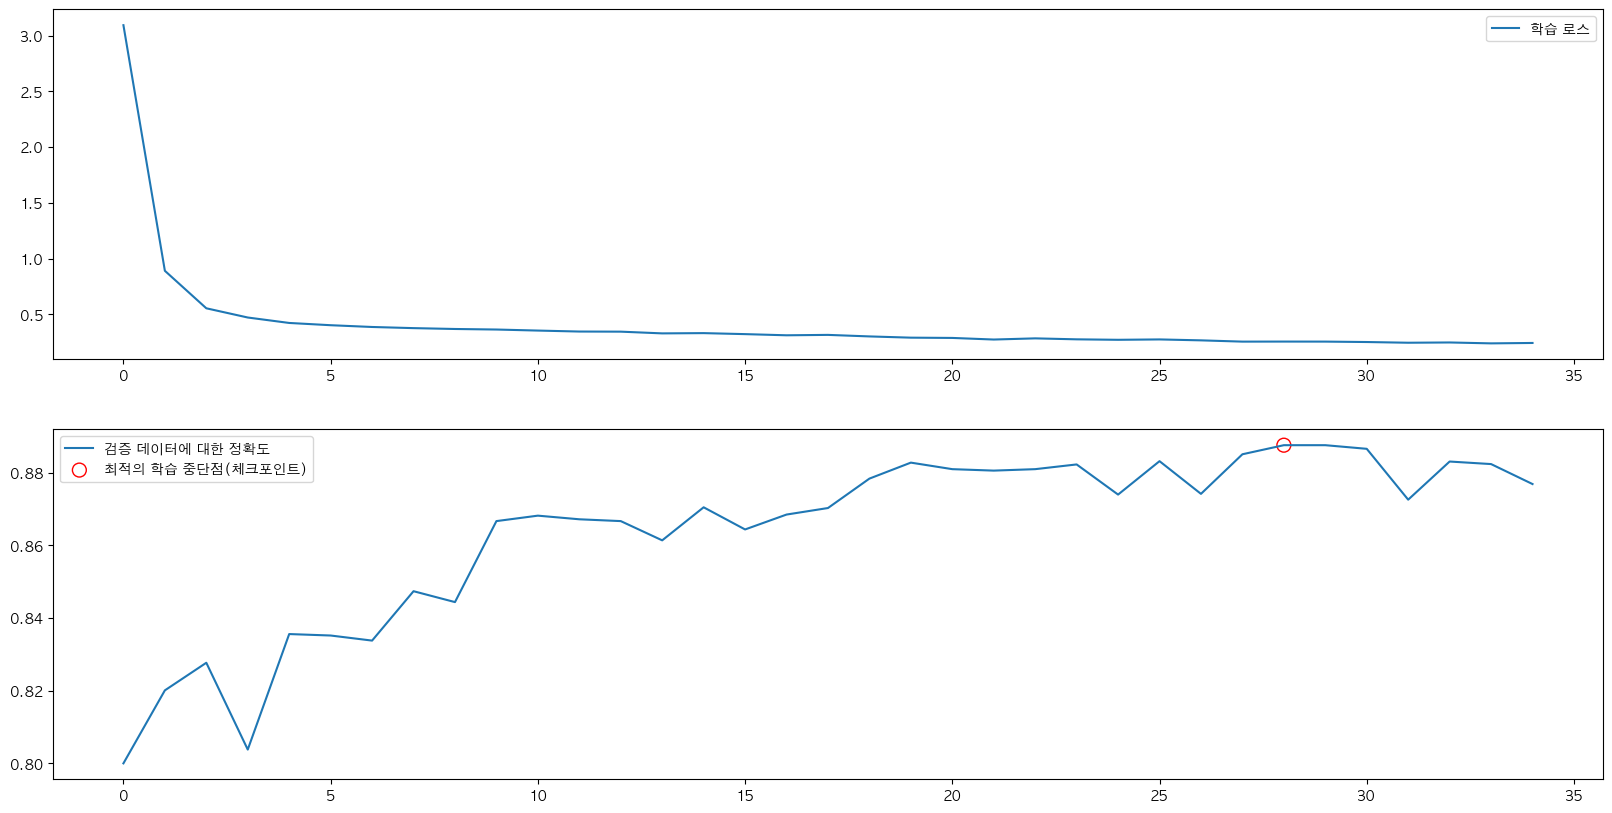

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
matplotlib.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='AppleGothic')

train_loss = model.loss_curve_

f, axs = plt.subplots(2,1,figsize=(20,10))

# 학습 로스에 대한 변동
axs[0].plot(train_loss, label='학습 로스')
axs[0].legend()

# 검증용 데이터에 대한 정확도 변동
axs[1].plot(model.validation_scores_, label='검증 데이터에 대한 정확도')
axs[1].scatter(np.argmax(model.validation_scores_), np.max(model.validation_scores_), s=100, facecolors='none', edgecolors='r',
               label='최적의 학습 중단점(체크포인트)')
axs[1].legend()
plt.show()

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix

train_acc = accuracy_score(model.predict(dataset.data.numpy().reshape(60000, -1)), dataset.targets.numpy())
test_acc = accuracy_score(model.predict(test_dataset.data.numpy().reshape(10000, -1)), test_dataset.targets.numpy())

print(f'train acc : {train_acc:.3f}, test acc : {test_acc:.3f}')

train acc : 0.909, test acc : 0.873


In [15]:
import itertools

def plot_confusion_matrix(cm, classes, title, cmap=plt.cm.Blues):
    plt.figure(figsize=(15, 15))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.test(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="red" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'test'

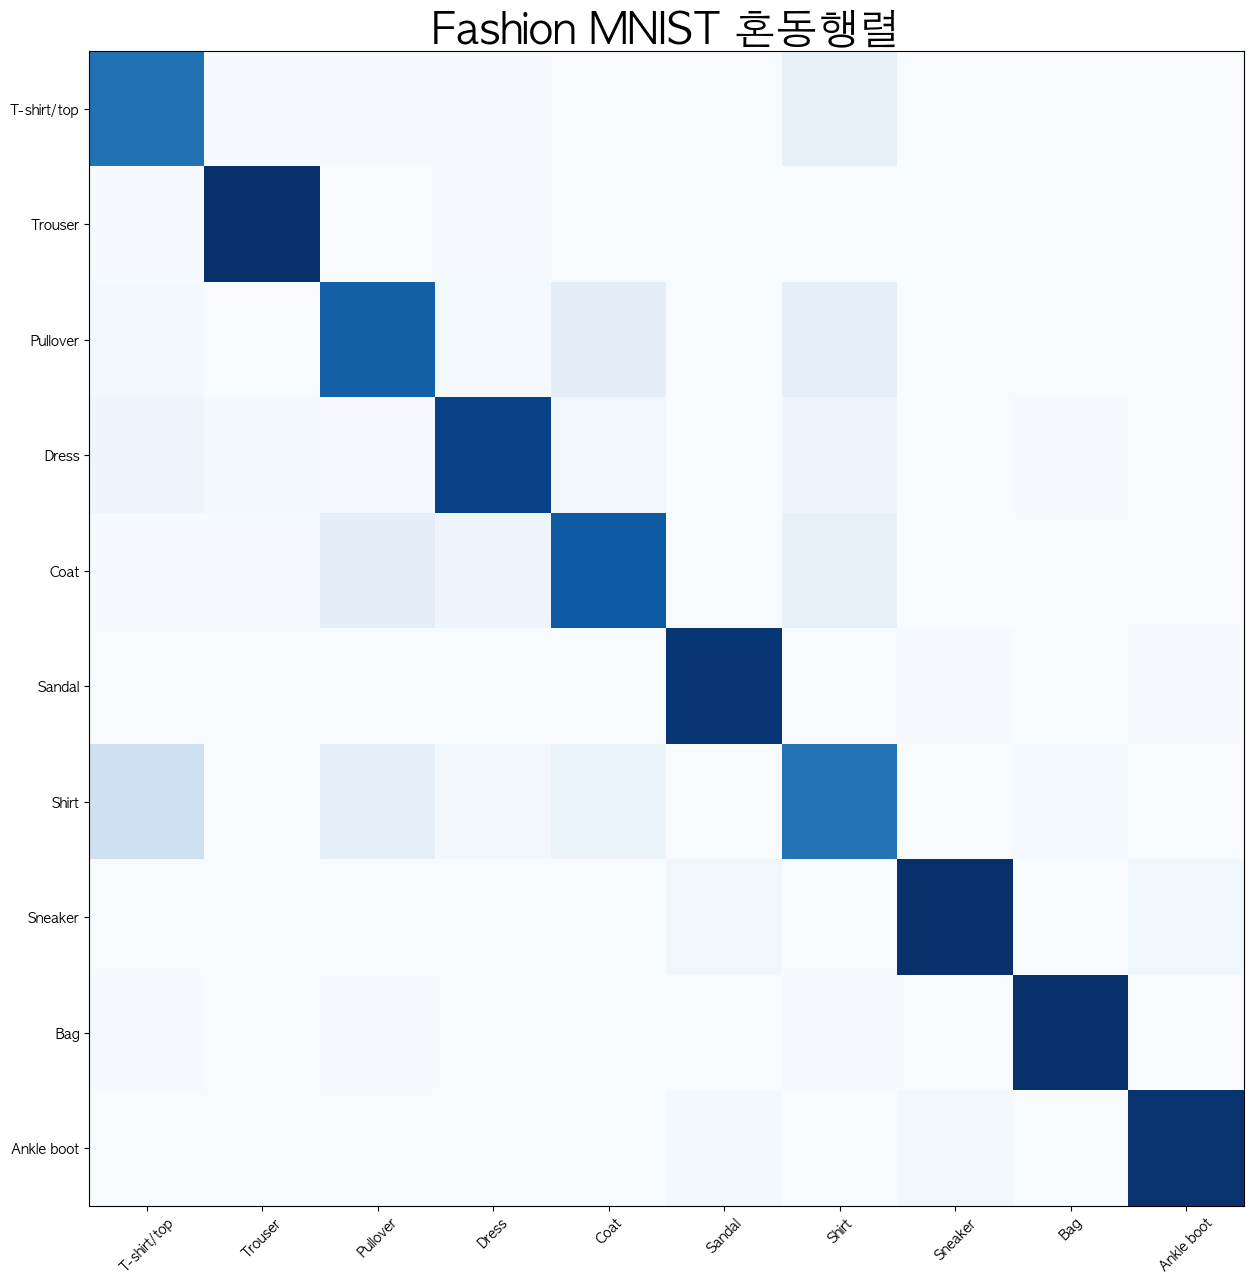

In [16]:
confusion_matrix_ = confusion_matrix(model.predict(test_dataset.data.numpy().reshape(10000,-1)), test_dataset.targets.numpy())
plot_confusion_matrix(cm = confusion_matrix_, classes=dataset.classes, title='Fashion MNIST 혼동행렬')

In [ ]:
for_visualization_test_x = test_dataset.data.numpy()[:100] # 입력 데이터 100개
for_visualization_test_y = test_dataset.targets.numpy()[:100] # 정답 데이터 100개

f, axs = plt.subplots(10,10, figsize=(20,20))
plt.subplots_adjust(hspace=0.8, wspace=0.1)
for i in range(10):
    for j in range(10):
        x_data = for_visualization_test_x[10*i+j]
        y_data = for_visualization_test_y[10*i+j]

        real_class = dataset.classes[y_data] # 정답데이터 라벨 가져오기
        predicted_class = dataset.classes[np.argmax(model.predict_proba(x_data.reshape(1,-1)))] # 모델 예측 결과 중 가장 높은 확률의 라벨
        predicted_prob = np.max(model.predict_proba(x_data.reshape(1, -1))).round(2) # 모델 예측 결과 중 가장 높은 값

        # x, y 축의 눈금 표시 제거
        axs[i,j].set_xticks([])
        axs[i,j].set_yticks([])

        axs[i,j].set_title(f'실제 class:{real_class}\n예측 class:{predicted_class}\nProbability:{predicted_prob}')

        axs[i,j].imshow(x_data.reshape((28,28)), cmap=plt.cm.gray_r)

plt.show()